In [15]:
import pandas as pd
df = pd.read_csv('cricketers.csv',delimiter = '\t',header=0)
print (df.describe())
print (df.head(5))

       matches_played  innings_batted  runs_scored  highest_runs  balls_faced  \
count      109.000000      109.000000   109.000000    109.000000   109.000000   
mean         9.559633        7.889908   173.633028     43.495413   124.669725   
std          5.161164        4.982078   182.356522     29.830268   123.670265   
min          0.000000        0.000000     0.000000      0.000000     0.000000   
25%          5.000000        4.000000    36.000000     20.000000    33.000000   
50%         10.000000        7.000000    99.000000     40.000000    76.000000   
75%         14.000000       13.000000   260.000000     62.000000   188.000000   
max         17.000000       17.000000   735.000000    128.000000   516.000000   

       average_runs  strike_rate  innings_bowled       overs  runs_given  \
count    109.000000   109.000000      109.000000  109.000000   109.00000   
mean      22.360092   122.258716        4.513761   13.894495   119.93578   
std       16.093453    48.576709        5.

In [16]:
import numpy as np

df = df.drop(['PLAYER'], axis=1)

# classification needs scaled data and this can be used 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)



In [32]:
df_scaled = pd.DataFrame(data=scaled_df)

df_new = df_scaled[[5,12]]

df_new.columns = ['average_runs', 'bowling_economy']

print (df_new.describe())

       average_runs  bowling_economy
count  1.090000e+02     1.090000e+02
mean  -8.555847e-17    -5.703898e-17
std    1.004619e+00     1.004619e+00
min   -1.395808e+00    -1.083832e+00
25%   -6.592040e-01    -1.083832e+00
50%   -7.491462e-02     4.483192e-01
75%    4.769142e-01     8.587169e-01
max    3.337810e+00     2.388764e+00


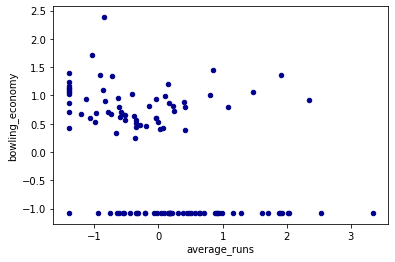

In [40]:
ax1 = df_new.plot.scatter(x='average_runs',y='bowling_economy', c='DarkBlue')

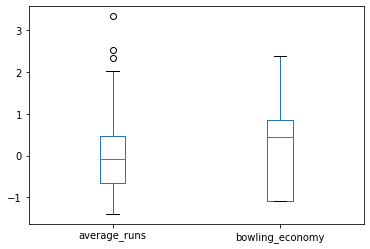

In [35]:
#outlier anaylsis
ax = df_new.plot.box()

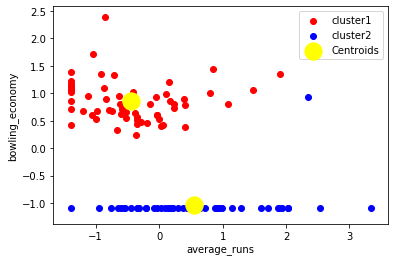

In [52]:
import random as rd
import matplotlib.pyplot as plt

X = df_new.iloc[:, :].values

m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100



K=2 # number of clusters

Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
Output={}

EuclidianDistance=np.array([]).reshape(m,0)

for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

'''   
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.title('Plot of data points')
plt.show()
'''

color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.show()

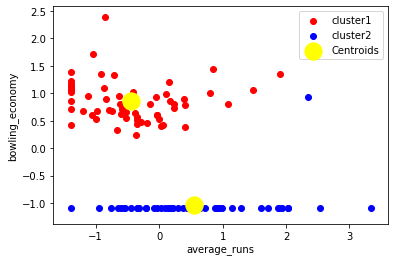

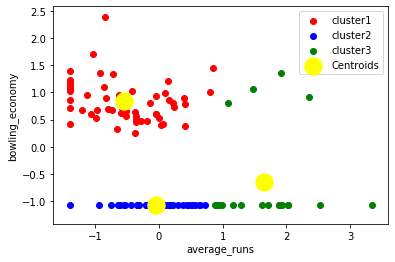

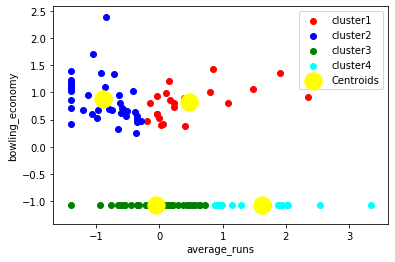

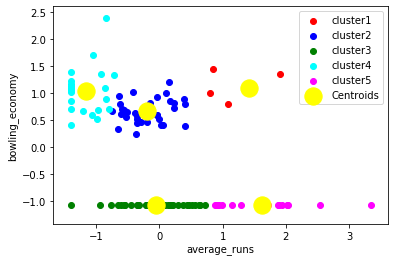

In [51]:
import random as rd
import matplotlib.pyplot as plt

X = df_new.iloc[:, :].values

m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100


for g in range (2,6):
     K=g # number of clusters
     
     Centroids=np.array([]).reshape(n,0) 
     
     for i in range(K):
         rand=rd.randint(0,m-1)
         Centroids=np.c_[Centroids,X[rand]]
         
     Output={}
     
     EuclidianDistance=np.array([]).reshape(m,0)
     
     for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
     C=np.argmin(EuclidianDistance,axis=1)+1
     
     Y={}
     for k in range(K):
         Y[k+1]=np.array([]).reshape(2,0)
     for i in range(m):
         Y[C[i]]=np.c_[Y[C[i]],X[i]]
          
     for k in range(K):
         Y[k+1]=Y[k+1].T
         
     for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
             
     for i in range(n_iter):
          #step 2.a
           EuclidianDistance=np.array([]).reshape(m,0)
           for k in range(K):
               tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
               EuclidianDistance=np.c_[EuclidianDistance,tempDist]
           C=np.argmin(EuclidianDistance,axis=1)+1
          #step 2.b
           Y={}
           for k in range(K):
               Y[k+1]=np.array([]).reshape(2,0)
           for i in range(m):
               Y[C[i]]=np.c_[Y[C[i]],X[i]]
          
           for k in range(K):
               Y[k+1]=Y[k+1].T
         
           for k in range(K):
               Centroids[:,k]=np.mean(Y[k+1],axis=0)
           Output=Y
     
     '''   
     plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
     plt.xlabel('average_runs')
     plt.ylabel('bowling_economy')
     plt.legend()
     plt.title('Plot of data points')
     plt.show()
     '''
     
     color=['red','blue','green','cyan','magenta']
     labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
     for k in range(K):
         plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
     plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
     plt.xlabel('average_runs')
     plt.ylabel('bowling_economy')
     plt.legend()
     plt.show()

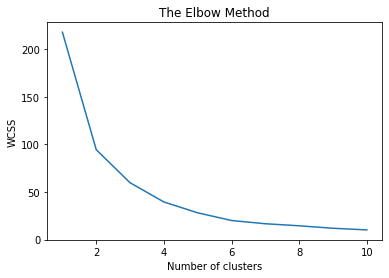

In [65]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()